### 1. Re-code the house price machine learning

In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data = load_boston()
x, y = data['data'], data['target']
#x.shape, y.shape

In [5]:
def draw_rm_and_price():
    plt.scatter(x[:,5],y)      #犯罪率与房价的关系

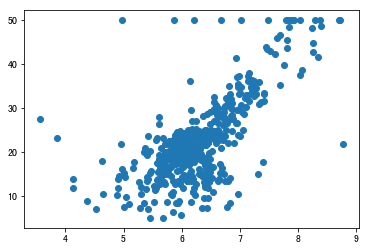

In [6]:
draw_rm_and_price()

In [7]:
def price(rm, k ,b):
    """f(x) = k * x + b"""
    return k * rm + b

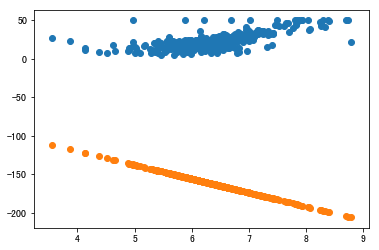

In [11]:
x_rm = x[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k ,b)for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)   #黄色线为生成的线

### Loss      

$$ loss = \frac{1}{2n}\sum{(y_i - \hat{y_i)}2}$$

In [12]:
def squared_loss(y, y_hat):  #to evaluate the performance
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/ (2*len(list(y)))

###### 1. Random Choose Method to get optimal *k* and *b*

When time is : 0, get best_k: -35 best_b: 71, and the loss is: 15206.214599382412
When time is : 2, get best_k: -18 best_b: 80, and the loss is: 1751.5562901462456
When time is : 3, get best_k: -4 best_b: 85, and the loss is: 760.8038861185772
When time is : 31, get best_k: 3 best_b: 23, and the loss is: 217.62560140612644
When time is : 52, get best_k: -3 best_b: 40, and the loss is: 58.842084805335965
When time is : 103, get best_k: 4 best_b: 5, and the loss is: 57.13665133596838
When time is : 297, get best_k: -1 best_b: 27, and the loss is: 48.59223660770753
When time is : 1060, get best_k: 16 best_b: -77, and the loss is: 34.04328856916996
When time is : 1262, get best_k: 14 best_b: -68, and the loss is: 30.955952185770748
When time is : 1500, get best_k: 14 best_b: -66, and the loss is: 27.860102383399198


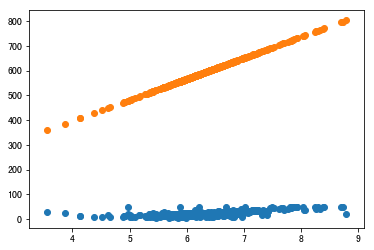

In [36]:
x_rm = x[:, 5]

trying_times = 2000
min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.randint(-100, 100)  #random.random() * 200 - 100
    b = random.randint(-100, 100)  #random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k ,b)for r in x_rm]
    current_loss = squared_loss(y, price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

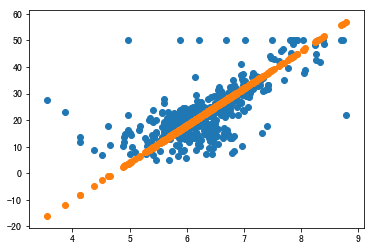

In [37]:
price_by_random_k_and_b = [price(r, best_k ,best_b)for r in x_rm]
draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

###### 2.1 Supervised Direction to get optimal *k* and *b*

In [38]:
trying_times = 2000
min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100
direction = [
    (+1, -1), #first element: k's change direction,second element: b's change direction
    (+1, +1),
    (-1, -1),
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1
for i in range(trying_times):
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
   
    price_by_k_and_b = [price(r, current_k , current_b)for r in x_rm]
    
    current_loss = squared_loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When times is: {}, Get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(list(set(direction)-{next_direction}))  # 如何每次都能让沿着变化方向走=>梯度
        

When times is: 0, Get best_k: -63.2220776024491 best_b: -7.801004795807424, and the loss is: 92757.55202375013
When times is: 1, Get best_k: -63.122077602449096 best_b: -7.701004795807425, and the loss is: 92442.72070520384
When times is: 2, Get best_k: -63.022077602449095 best_b: -7.601004795807425, and the loss is: 92128.42497259134
When times is: 3, Get best_k: -62.92207760244909 best_b: -7.501004795807425, and the loss is: 91814.66482591262
When times is: 4, Get best_k: -62.82207760244909 best_b: -7.401004795807426, and the loss is: 91501.44026516746
When times is: 5, Get best_k: -62.72207760244909 best_b: -7.301004795807426, and the loss is: 91188.75129035616
When times is: 6, Get best_k: -62.62207760244909 best_b: -7.201004795807426, and the loss is: 90876.59790147863
When times is: 7, Get best_k: -62.52207760244909 best_b: -7.101004795807427, and the loss is: 90564.98009853468
When times is: 8, Get best_k: -62.422077602449086 best_b: -7.001004795807427, and the loss is: 90253.89

When times is: 237, Get best_k: -39.52207760244876 best_b: 15.898995204192525, and the loss is: 33120.72575112474
When times is: 238, Get best_k: -39.42207760244876 best_b: 15.998995204192525, and the loss is: 32932.82829887373
When times is: 239, Get best_k: -39.32207760244876 best_b: 16.098995204192526, and the loss is: 32745.46643255642
When times is: 240, Get best_k: -39.222077602448756 best_b: 16.198995204192528, and the loss is: 32558.640152172884
When times is: 241, Get best_k: -39.122077602448755 best_b: 16.29899520419253, and the loss is: 32372.34945772307
When times is: 242, Get best_k: -39.02207760244875 best_b: 16.39899520419253, and the loss is: 32186.594349207004
When times is: 243, Get best_k: -38.92207760244875 best_b: 16.498995204192532, and the loss is: 32001.37482662464
When times is: 244, Get best_k: -38.82207760244875 best_b: 16.598995204192533, and the loss is: 31816.690889976046
When times is: 245, Get best_k: -38.72207760244875 best_b: 16.698995204192535, and th

When times is: 461, Get best_k: -17.122077602448442 best_b: 38.29899520419284, and the loss is: 4408.490727866306
When times is: 462, Get best_k: -17.02207760244844 best_b: 38.39899520419284, and the loss is: 4340.564524771964
When times is: 463, Get best_k: -16.92207760244844 best_b: 38.498995204192845, and the loss is: 4273.173907611367
When times is: 464, Get best_k: -16.822077602448438 best_b: 38.598995204192846, and the loss is: 4206.318876384497
When times is: 465, Get best_k: -16.722077602448437 best_b: 38.69899520419285, and the loss is: 4139.999431091364
When times is: 466, Get best_k: -16.622077602448435 best_b: 38.79899520419285, and the loss is: 4074.2155717319706
When times is: 467, Get best_k: -16.522077602448434 best_b: 38.89899520419285, and the loss is: 4008.967298306306
When times is: 468, Get best_k: -16.422077602448432 best_b: 38.99899520419285, and the loss is: 3944.254610814384
When times is: 469, Get best_k: -16.32207760244843 best_b: 39.09899520419285, and the l

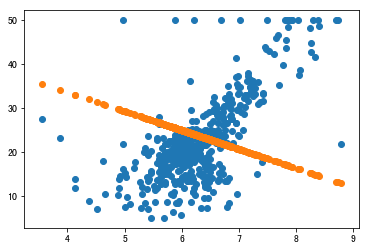

In [39]:
price_by_random_k_and_b = [price(r, best_k ,best_b)for r in x_rm]
draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

###### 2.2 Supervised Direction to get optimal *k* and *b*      change the learning rate

In [48]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.05

update_time = 0

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]

    current_loss = squared_loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 11, get best_k: 82.12783448453445 best_b: -1.7524000858922197, and the loss is: 122297.75968210083
When time is : 21, get best_k: 81.62783448453447 best_b: -2.252400085892219, and the loss is: 120494.96119162752
When time is : 31, get best_k: 81.1278344845345 best_b: -2.752400085892217, and the loss is: 118705.55234949761
When time is : 41, get best_k: 80.62783448453453 best_b: -3.2524000858922153, and the loss is: 116929.53315571113
When time is : 51, get best_k: 80.12783448453456 best_b: -3.7524000858922135, and the loss is: 115166.90361026803
When time is : 61, get best_k: 79.62783448453459 best_b: -4.252400085892212, and the loss is: 113417.66371316835
When time is : 71, get best_k: 79.12783448453462 best_b: -4.75240008589221, and the loss is: 111681.81346441201
When time is : 81, get best_k: 78.62783448453465 best_b: -5.252400085892209, and the loss is: 109959.352863999
When time is : 91, get best_k: 78.12783448453467 best_b: -5.752400085892207, and the loss is: 108

When time is : 811, get best_k: 42.12783448453672 best_b: -41.752400085891985, and the loss is: 20385.16920931733
When time is : 821, get best_k: 41.62783448453675 best_b: -42.252400085891956, and the loss is: 19653.54258631437
When time is : 831, get best_k: 41.12783448453678 best_b: -42.75240008589193, and the loss is: 18935.30561165475
When time is : 841, get best_k: 40.627834484536805 best_b: -43.2524000858919, and the loss is: 18230.458285338533
When time is : 851, get best_k: 40.127834484536834 best_b: -43.75240008589187, and the loss is: 17539.00060736571
When time is : 861, get best_k: 39.62783448453686 best_b: -44.25240008589184, and the loss is: 16860.932577736232
When time is : 871, get best_k: 39.12783448453689 best_b: -44.752400085891814, and the loss is: 16196.25419645014
When time is : 881, get best_k: 38.62783448453692 best_b: -45.252400085891786, and the loss is: 15544.965463507438
When time is : 891, get best_k: 38.12783448453695 best_b: -45.75240008589176, and the lo

###### 3.Gradient Descent to get optimal *k* and *b*

$$\frac{\partial L}{\partial\hat{y_i}}=\hat{y_i}-y_i$$
$$\frac{\partial L}{\partial k}=\frac{1}{n}\sum\frac{\partial L}{\partial\hat{y_i}}*\frac{\partial\hat{y_i}}{\partial k}=\frac{1}{n} * \sum{(\hat{y_i}-y_i)}*x_i$$
$$\frac{\partial L}{\partial b}=\frac{1}{n}\sum\frac{\partial L}{\partial\hat{y_i}}=\frac{1}{n} * \sum{(\hat{y_i}-y_i)}$$

In [49]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -1 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -1 / n * gradient

In [1]:
def train_by_gradient_descend(trying_times, learning_rate):
    min_loss = float('inf') 
    current_k = random.random()
    current_b = random.random()
    
    for i in range(trying_times):
    
        y_hat = [price(r, current_k, current_b) for r in x_rm]
        
        current_loss = squared_loss(y, y_hat)

        if current_loss < min_loss: # performance became better
            min_loss = current_loss
        
            if i % 50 == 0: 
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, squared_loss(y, y_hat)))

        k_gradient = partial_k(x_rm, y, y_hat)
    
        b_gradient = partial_b(x_rm, y, y_hat)
    
        current_k -= k_gradient * learning_rate

        current_b -= b_gradient * learning_rate
    
    return current_k, current_b

In [2]:
k, b = train_by_gradient_descend(10000, 0.03)

NameError: name 'random' is not defined

When time is : 0, get best_k: 0.2135641150064458 best_b: 0.4759272055658841, and the loss is: 255.8128092381086
When time is : 50, get best_k: 3.5125714688615037 best_b: 0.8848621782229215, and the loss is: 29.588182369125715
When time is : 100, get best_k: 3.529382735480152 best_b: 0.7781485057382294, and the loss is: 29.541502010781752
When time is : 150, get best_k: 3.546109163201765 best_b: 0.6717497274822926, and the loss is: 29.495101477057485
When time is : 200, get best_k: 3.562785386520919 best_b: 0.5656703029934027, and the loss is: 29.448979065880593
When time is : 250, get best_k: 3.579411556486344 best_b: 0.459909273794343, and the loss is: 29.403133110198066
When time is : 300, get best_k: 3.595987823332192 best_b: 0.35446568422796265, and the loss is: 29.357561952949066
When time is : 350, get best_k: 3.612514336841687 best_b: 0.24933858150549681, and the loss is: 29.312263947005103
When time is : 400, get best_k: 3.628991246348482 best_b: 0.14452701569795684, and the lo

When time is : 1650, get best_k: 4.564174877819142 best_b: -5.8042864248077946, and the loss is: 26.933505666252238
When time is : 1700, get best_k: 4.591375849844094 best_b: -5.9773150178365135, and the loss is: 26.872151596446777
When time is : 1750, get best_k: 4.6184137756761645 best_b: -6.1493064547912795, and the loss is: 26.811530850891828
When time is : 1800, get best_k: 4.645289632635612 best_b: -6.320266952521597, and the loss is: 26.751634664652062
When time is : 1850, get best_k: 4.672004392184508 best_b: -6.490202690612347, and the loss is: 26.692454377553513
When time is : 1900, get best_k: 4.698559019961856 best_b: -6.659119811607175, and the loss is: 26.633981432931478
When time is : 1950, get best_k: 4.72495447581849 best_b: -6.827024421230515, and the loss is: 26.576207376393445
When time is : 0, get best_k: 0.0857997267173165 best_b: 0.12956628107343748, and the loss is: 280.8445052145156
When time is : 50, get best_k: 3.6778844972631983 best_b: -0.16648872752687602,

When time is : 1350, get best_k: 3.9611578278444686 best_b: -1.968423808069926, and the loss is: 28.38839268231101
When time is : 1400, get best_k: 3.976588290824049 best_b: -2.066578804027031, and the loss is: 28.348903829942934
When time is : 1450, get best_k: 3.991972439574868 best_b: -2.1644391897094617, and the loss is: 28.309651671839596
When time is : 1500, get best_k: 4.007310413108167 best_b: -2.262005849384116, and the loss is: 28.27063478926707
When time is : 1550, get best_k: 4.0226023500179435 best_b: -2.359279664663785, and the loss is: 28.23185177199528
When time is : 1600, get best_k: 4.037848388482212 best_b: -2.456261514515114, and the loss is: 28.193301218246923
When time is : 1650, get best_k: 4.053048666264246 best_b: -2.55295227526655, and the loss is: 28.154981734646938
When time is : 1700, get best_k: 4.068203320713827 best_b: -2.649352820616254, and the loss is: 28.11689193617207
When time is : 1750, get best_k: 4.083312488768483 best_b: -2.745464021640003, and

When time is : 0, get best_k: 0.9111084867573841 best_b: 0.4203860110544767, and the loss is: 172.5860020972836
When time is : 50, get best_k: 3.554575572456004 best_b: 0.6178938990373567, and the loss is: 29.47166810490034
When time is : 100, get best_k: 3.587828215104185 best_b: 0.40636991507906556, and the loss is: 29.3799770733588
When time is : 150, get best_k: 3.620881537043054 best_b: 0.1961138336139849, and the loss is: 29.2893819635255
When time is : 200, get best_k: 3.653736733036302 best_b: -0.012881945330226154, and the loss is: 29.199869676579567
When time is : 250, get best_k: 3.6863949906768263 best_b: -0.22062497617212698, and the loss is: 29.111427270261657
When time is : 300, get best_k: 3.718857490438935 best_b: -0.42712276804810184, and the loss is: 29.024041957002712
When time is : 350, get best_k: 3.751125405721019 best_b: -0.6323827850837868, and the loss is: 28.937701102074822
When time is : 400, get best_k: 3.783199902887965 best_b: -0.8364124466638704, and the

When time is : 3600, get best_k: 5.482053081785111 best_b: -11.643017998748244, and the loss is: 25.066943060769546
When time is : 3650, get best_k: 5.503752171504214 best_b: -11.781048469154088, and the loss is: 25.027898768099774
When time is : 3700, get best_k: 5.525321194034378 best_b: -11.918251566821901, and the loss is: 24.9893211458033
When time is : 3750, get best_k: 5.546760929015387 best_b: -12.054632251132363, and the loss is: 24.951204616080577
When time is : 3800, get best_k: 5.568072151413763 best_b: -12.190195451738962, and the loss is: 24.913543667799857
When time is : 3850, get best_k: 5.5892556315507775 best_b: -12.324946068746218, and the loss is: 24.876332855700124
When time is : 3900, get best_k: 5.610312135130292 best_b: -12.45888897288676, and the loss is: 24.839566799604057
When time is : 3950, get best_k: 5.631242423266445 best_b: -12.592029005697423, and the loss is: 24.803240183639907
When time is : 4000, get best_k: 5.652047252511151 best_b: -12.72437097969

When time is : 2250, get best_k: 7.206927023538118 best_b: -22.61514469406065, and the loss is: 22.695591505586833
When time is : 2300, get best_k: 7.251967998784653 best_b: -22.901655652874922, and the loss is: 22.653540983606682
When time is : 2350, get best_k: 7.2959385282922025 best_b: -23.181357380020547, and the loss is: 22.613465459447742
When time is : 2400, get best_k: 7.3388640523198605 best_b: -23.45441170398783, and the loss is: 22.57527217287281
When time is : 2450, get best_k: 7.380769406512439 best_b: -23.720976607244243, and the loss is: 22.5388727203389
When time is : 2500, get best_k: 7.421678836269753 best_b: -23.981206317639224, and the loss is: 22.50418285037523
When time is : 2550, get best_k: 7.4616160107744145 best_b: -24.235251397636553, and the loss is: 22.47112226857192
When time is : 2600, get best_k: 7.500604036686232 best_b: -24.483258831426078, and the loss is: 22.439614451727323
When time is : 2650, get best_k: 7.538665471511151 best_b: -24.7253721099651

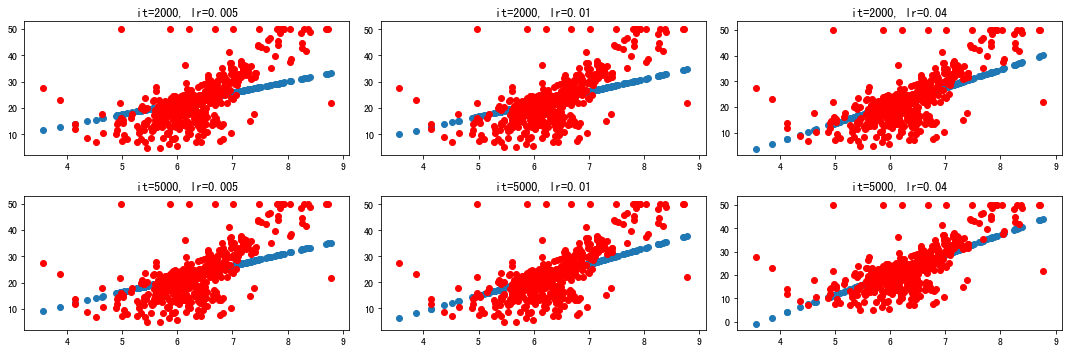

In [59]:
params = [(trying_times, learning_rate) for trying_times in [2000, 5000] for learning_rate in [0.005, 0.01, 0.04]]
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
for ax, (trying_times, learning_rate) in zip(axs.flatten(), params):
    k, b = train_by_gradient_descend(trying_times, learning_rate)
    title = "it={it}, lr={lr}".format(it=trying_times, lr=learning_rate)
    ax.set_title(title)
    ax.scatter(x_rm, [price(r, k, b) for r in x_rm])
    ax.scatter(x_rm, y, color='red')
fig.tight_layout()

###### 4. Try different Loss function and learning rate.   偏导不一样、选用 random.choice(法一)

 $Loss = \frac{1}{n} \sum({y_i - \hat{y_i}})^2$   
 $Loss = \frac{1}{n} \sum(|{y_i - \hat{y_i}}|)$

In [71]:
def mean_absolute_error(y, y_hat):
    return np.abs(y_hat - y).sum() / y.size

In [83]:
def single_square_loss(y, y_hat):  #to evaluate the performance
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/ len(list(y))
#np.square(y_hat - y).sun() / y.size

In [84]:
def supervised_direction(loss_func, scalar):
    trying_times = 2000
    min_loss = float('inf')

    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100

    direction = [
        (+1, -1),  # first element: k's change direction, second element: b's change direction
        (+1, +1), 
        (-1, -1), 
        (-1, +1),
    ]

    next_direction = random.choice(direction)

    for i in range(trying_times):
    
        k_direction, b_direction = next_direction
    
        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
        price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]

        current_loss = loss_func(y, price_by_k_and_b)
    
        if current_loss < min_loss: # performance became better
            min_loss = current_loss
            best_k, best_b = current_k, current_b
        
            next_direction = next_direction
        
            if i % 100 == 0: 
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)
            
    return best_k, best_b

When time is : 0, get best_k: 0.5120176445696148 best_b: -14.006032663463506, and the loss is: 595.1225479966225
When time is : 100, get best_k: 1.012017644569615 best_b: -14.506032663463584, and the loss is: 508.5142677514677
When time is : 200, get best_k: 1.5120176445696043 best_b: -15.006032663463662, and the loss is: 429.0110014623421
When time is : 300, get best_k: 2.012017644569594 best_b: -15.50603266346374, and the loss is: 356.61274912924296
When time is : 400, get best_k: 2.512017644569583 best_b: -16.006032663463817, and the loss is: 291.3195107521714
When time is : 500, get best_k: 3.0120176445695725 best_b: -16.506032663463717, and the loss is: 233.13128633112296
When time is : 600, get best_k: 3.512017644569562 best_b: -17.006032663463618, and the loss is: 182.04807586610204
When time is : 700, get best_k: 4.012017644569552 best_b: -17.506032663463518, and the loss is: 138.06987935710922
When time is : 800, get best_k: 4.512017644569541 best_b: -18.00603266346342, and th

When time is : 0, get best_k: -75.81556233202856 best_b: -53.6973971880973, and the loss is: 552.7032936404869
When time is : 100, get best_k: -74.84556233202807 best_b: -54.667397188097105, and the loss is: 547.5771982847523
When time is : 200, get best_k: -73.84556233202755 best_b: -55.667397188096906, and the loss is: 542.2925638973971
When time is : 300, get best_k: -72.84556233202704 best_b: -56.66739718809671, and the loss is: 537.0079295100419
When time is : 400, get best_k: -71.84556233202653 best_b: -57.66739718809651, and the loss is: 531.7232951226867
When time is : 500, get best_k: -70.84556233202602 best_b: -58.66739718809631, and the loss is: 526.4386607353316
When time is : 600, get best_k: -69.84556233202551 best_b: -59.66739718809611, and the loss is: 521.1540263479765
When time is : 700, get best_k: -68.845562332025 best_b: -60.66739718809591, and the loss is: 515.8693919606212
When time is : 800, get best_k: -67.84556233202449 best_b: -61.66739718809571, and the loss

When time is : 1300, get best_k: -63.730206644145575 best_b: -40.687749193772625, and the loss is: 217713.40009640498
When time is : 1400, get best_k: -62.730206644145774 best_b: -39.687749193772824, and the loss is: 210938.81435638864
When time is : 1500, get best_k: -61.73020664414597 best_b: -38.68774919377302, and the loss is: 204271.34580311843
When time is : 1600, get best_k: -60.73020664414617 best_b: -37.68774919377322, and the loss is: 197710.99443659553
When time is : 1700, get best_k: -59.73020664414637 best_b: -36.68774919377342, and the loss is: 191257.7602568196
When time is : 1800, get best_k: -58.73020664414657 best_b: -35.68774919377362, and the loss is: 184911.64326379067
When time is : 1900, get best_k: -57.73020664414677 best_b: -34.68774919377382, and the loss is: 178672.64345750894
When time is : 0, get best_k: -89.70410182375633 best_b: 75.59539168762272, and the loss is: 265662.89850420936
When time is : 100, get best_k: -85.7041018237557 best_b: 79.595391687623

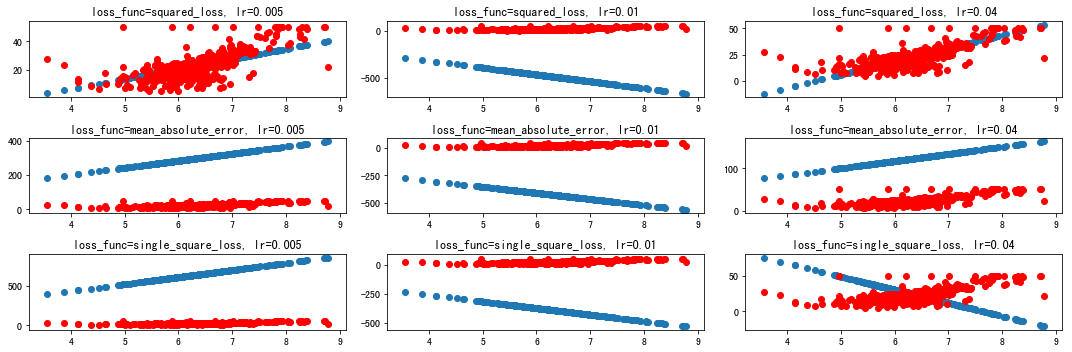

In [85]:
params = [(loss, scalar) for loss in [squared_loss, mean_absolute_error, single_square_loss] for scalar in [0.005, 0.01, 0.04]]
fig, axs = plt.subplots(3, 3, figsize=(15, 5))
for ax, (loss, scalar) in zip(axs.flatten(), params):
    k, b = supervised_direction(loss, scalar)
    title = "loss_func={}, lr={}".format(loss.__name__, scalar)
    ax.set_title(title)
    ax.scatter(x_rm, [price(r, k, b) for r in x_rm])
    ax.scatter(x_rm, y, color='red')
fig.tight_layout()